<a href="https://colab.research.google.com/github/fhvo/final_ai/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name : <b>Brendon Hongpong </b><br>

Student Number : <b>991315639</b>

Installing PyCaret & Enable colab

In [1]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 46.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 113 kB 68.1 MB/s 
     |████████████████████████████████| 261 kB 53.2 MB/s 
     |████████████████████████████████| 6.8 MB 14.8 MB/s 
     |████████████████████████████████| 2.0 MB 54.7 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 1.3 MB 70.4 MB/s 
     |████████████████████████████████| 15.5 MB 22.5 MB/s 
     |████████████████████████████████| 167 kB 60.1 MB/s 
     |████████████████████████████████| 596 kB 56.5 MB/s 
     |████████████████████████████████| 10.1 MB 41.1 MB/s 
     |████████████████████████████████| 303 kB 24.7 MB/s 
     |████████████████

Import data & library


In [2]:
from pycaret.datasets import get_data
from pycaret.utils import check_metric
import numpy as np
import pandas as pd

Dataset loading 
+
Dropping subject & motor_UPDRS

In [4]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')
dataset.drop('motor_UPDRS', axis = 1, inplace = True)
dataset.drop('subject#', axis = 1, inplace = True)
data = dataset.sample(frac = 0.9, random_state = 786)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
print('Data for modeling: ' + str(data.shape))
print('Unseen data : ' + str(data_unseen.shape))
data.head()

Data for modeling: (5288, 20)
Unseen data : (587, 20)


,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,73,1,148.560,27.486,0.00349,0.000016,0.00195,0.00194,0.00586,0.02356,0.254,0.01057,0.01316,0.02151,0.03172,0.008311,26.048,0.37602,0.64891,0.12917
1,73,1,36.569,24.397,0.00303,0.000016,0.00143,0.00161,0.00428,0.02474,0.219,0.01240,0.01385,0.01834,0.03720,0.010560,22.814,0.55924,0.65925,0.13165
2,55,0,81.733,26.968,0.00976,0.000079,0.00461,0.00459,0.01383,0.03390,0.307,0.01732,0.01955,0.02087,0.05195,0.045426,20.013,0.56215,0.67937,0.31235
3,71,0,111.400,54.613,0.01496,0.000097,0.00730,0.00930,0.02189,0.03079,0.392,0.01519,0.01771,0.02824,0.04558,0.057204,17.558,0.60974,0.72924,0.50975
4,73,1,183.700,29.031,0.00372,0.000019,0.00162,0.00172,0.00486,0.02178,0.193,0.01092,0.01354,0.01859,0.03276,0.012297,22.901,0.44991,0.68096,0.19405


Setting up regression

In [8]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS',  fold_shuffle=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,total_UPDRS
2,Original Data,"(5288, 20)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3701, 17)"


Comparing All Models

In [9]:
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0232,3.1177,1.7569,0.9730,0.0938,0.0510,1.105
rf,Random Forest Regressor,1.0422,4.0315,1.9970,0.9650,0.0971,0.0507,2.733
lightgbm,Light Gradient Boosting Machine,1.4968,5.2399,2.2852,0.9545,0.1066,0.0680,0.240
dt,Decision Tree Regressor,0.6860,5.9253,2.3912,0.9485,0.1161,0.0343,0.054
gbr,Gradient Boosting Regressor,3.8414,23.8445,4.8817,0.7927,0.1961,0.1639,1.163
ada,AdaBoost Regressor,7.2093,68.7485,8.2888,0.4027,0.3211,0.3156,0.526
knn,K Neighbors Regressor,6.4744,71.0965,8.4251,0.3822,0.3154,0.2743,0.068
lr,Linear Regression,8.1355,96.2067,9.8039,0.1647,0.3643,0.3534,0.302
lar,Least Angle Regression,8.1453,96.3609,9.8121,0.1632,0.3647,0.3539,0.016
br,Bayesian Ridge,8.1452,96.7682,9.8324,0.1599,0.3651,0.3540,0.017


Create a Model


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Evaulating Top 3 Models

1. Extra Tress Regressor


In [10]:
et = create_model('et')
print(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0908,3.4872,1.8674,0.9706,0.0964,0.0542
1,0.8895,2.2369,1.4956,0.9789,0.0662,0.0366
2,0.9206,2.5065,1.5832,0.9769,0.1007,0.0524
3,1.0941,3.9089,1.9771,0.9688,0.1169,0.0610
4,1.1527,3.4957,1.8697,0.9720,0.0944,0.0544
5,0.9547,2.5223,1.5882,0.9787,0.1031,0.0542
6,0.9958,3.3893,1.8410,0.9692,0.0746,0.0413
7,0.9694,2.6836,1.6382,0.9773,0.0810,0.0451
8,1.1256,4.1567,2.0388,0.9640,0.1116,0.0587
9,1.0384,2.7900,1.6703,0.9737,0.0929,0.0518


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


2.Random Forest Regressor

In [11]:
rf = create_model('rf')
print(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0838,4.4034,2.0984,0.9629,0.1002,0.0532
1,0.9629,3.4187,1.8490,0.9678,0.0796,0.0414
2,0.9464,2.6188,1.6183,0.9758,0.0881,0.0486
3,1.0665,4.1526,2.0378,0.9668,0.1175,0.0597
4,1.0950,3.9968,1.9992,0.9680,0.0971,0.0503
5,0.9056,3.0818,1.7555,0.9740,0.1050,0.0520
6,1.0978,5.6288,2.3725,0.9489,0.0862,0.0438
7,1.1653,4.8805,2.2092,0.9588,0.0916,0.0505
8,1.0809,4.3838,2.0938,0.9621,0.1056,0.0556
9,1.0178,3.7500,1.9365,0.9647,0.1000,0.0516


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


3.Light Gradient Boosting Machine

In [12]:
lightgbm = create_model('lightgbm')
print(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5710,5.9918,2.4478,0.9495,0.1079,0.0702
1,1.4931,5.1732,2.2745,0.9513,0.0908,0.0587
2,1.4246,3.9524,1.9881,0.9635,0.0986,0.0659
3,1.4962,5.6708,2.3813,0.9547,0.1187,0.0708
4,1.4533,4.7210,2.1728,0.9622,0.0995,0.0642
5,1.5075,5.3337,2.3095,0.9550,0.1271,0.0787
6,1.4189,5.2745,2.2966,0.9521,0.0886,0.0588
7,1.6221,6.1274,2.4754,0.9483,0.1077,0.0691
8,1.4867,5.1187,2.2625,0.9557,0.1087,0.0694
9,1.4940,5.0359,2.2441,0.9525,0.1181,0.0738


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Tuning Top 3 Models

1.Extra Trees Regressor

In [13]:
tuned_et = tune_model(et)
print(tuned_et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.5610,21.1075,4.5943,0.8220,0.1996,0.1620
1,3.3201,18.2827,4.2758,0.8277,0.1634,0.1309
2,3.5014,20.5413,4.5322,0.8105,0.2188,0.1762
3,3.4646,20.4179,4.5186,0.8368,0.2153,0.1704
4,3.8320,23.7864,4.8771,0.8096,0.2075,0.1717
5,3.4780,20.1765,4.4918,0.8299,0.2185,0.1740
6,3.3726,18.9032,4.3478,0.8283,0.1696,0.1388
7,3.3963,19.0263,4.3619,0.8394,0.1929,0.1539
8,3.4550,20.5676,4.5352,0.8221,0.2115,0.1687
9,3.4573,19.3447,4.3983,0.8177,0.1966,0.1575


ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


2.Random Forest Regressor

In [16]:
rf_params = {'max_leaf_nodes': np.arange(10,200,10), 'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]}
tuned_rf = tune_model(rf, custom_grid = rf_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5199,5.6244,2.3716,0.9526,0.1108,0.0701
1,1.4817,4.9807,2.2317,0.9531,0.0921,0.0608
2,1.3804,3.9146,1.9785,0.9639,0.0988,0.0656
3,1.4440,5.0410,2.2452,0.9597,0.1235,0.0740
4,1.5509,5.4116,2.3263,0.9567,0.1085,0.0692
5,1.3290,4.1104,2.0274,0.9653,0.1148,0.0699
6,1.5213,6.7071,2.5898,0.9391,0.0975,0.0618
7,1.6108,6.1076,2.4714,0.9484,0.1010,0.0670
8,1.5419,5.6941,2.3862,0.9507,0.1178,0.0759
9,1.4539,4.8850,2.2102,0.9540,0.1121,0.0698


3.Light Gradient Boosting Machine

In [17]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5021,11.1936,3.3457,0.9056,0.1436,0.1096
1,2.5180,11.3664,3.3714,0.8929,0.1360,0.1005
2,2.4024,10.0565,3.1712,0.9072,0.1439,0.1097
3,2.5484,11.3513,3.3692,0.9093,0.1530,0.1153
4,2.6622,12.6180,3.5522,0.8990,0.1463,0.1142
5,2.4555,11.4764,3.3877,0.9032,0.1691,0.1220
6,2.5193,12.0619,3.4730,0.8904,0.1367,0.1037
7,2.4794,11.4660,3.3862,0.9032,0.1415,0.1059
8,2.4767,12.1066,3.4795,0.8953,0.1584,0.1146
9,2.2378,9.0844,3.0140,0.9144,0.1374,0.0996


Plotting the best Model base on lowest error scores.

1.Residual Plot


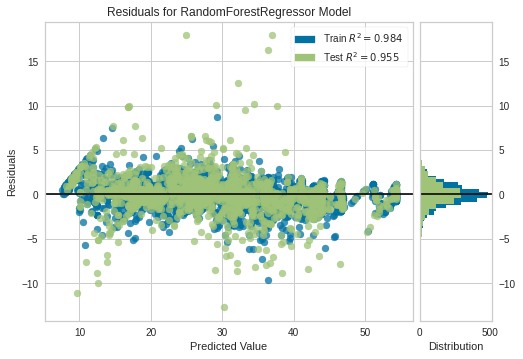

In [19]:
plot_model(tuned_rf)

2.Prediciton Error Plot

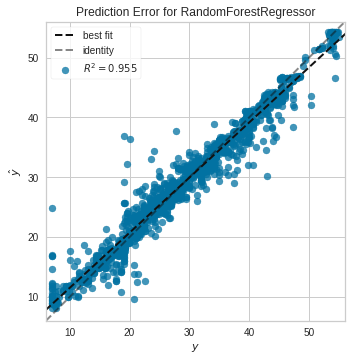

In [20]:
plot_model(tuned_rf, plot = 'error')

3.Feature Importance Plot

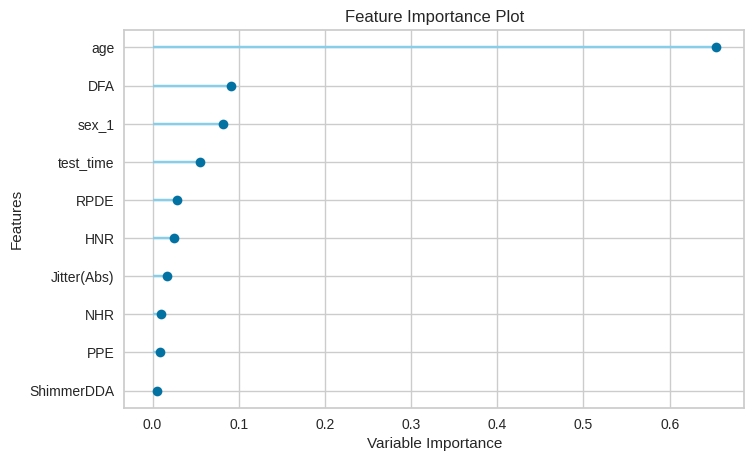

In [23]:
plot_model(tuned_rf, plot = 'feature')

Evaluate Model

In [21]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Predict on Test/Hold-out Sample

In [22]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4042,4.9531,2.2255,0.9553,0.1052,0.0647


,age,test_time,Jitter(%),Jitter(Abs),JitterPPQ5,JitterDDP,Shimmer,Shimmer(dB),ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE,sex_1,total_UPDRS,Label
0,66.0,72.412003,0.00662,0.000026,0.00343,0.01038,0.05092,0.463,0.02930,0.03957,0.08780,0.030395,18.784000,0.60339,0.58131,0.29215,1.0,30.148001,31.159390
1,55.0,117.779999,0.00506,0.000034,0.00223,0.00493,0.01881,0.188,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0.0,26.663000,23.205970
2,65.0,159.429993,0.00346,0.000034,0.00208,0.00505,0.01962,0.171,0.01173,0.01573,0.03095,0.007856,22.886999,0.53231,0.71290,0.17206,0.0,22.643999,12.665768
3,58.0,59.354000,0.01109,0.000112,0.00524,0.01804,0.03127,0.320,0.01802,0.02065,0.05242,0.028941,21.955000,0.50247,0.70848,0.28292,0.0,19.000000,16.068711
4,61.0,149.839996,0.00297,0.000025,0.00147,0.00358,0.02315,0.215,0.01277,0.01904,0.03157,0.011927,22.886000,0.52598,0.56518,0.12621,0.0,32.987999,34.151161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,55.0,183.820007,0.00983,0.000077,0.00573,0.01659,0.04462,0.405,0.02777,0.03158,0.07592,0.021957,19.681000,0.50804,0.73418,0.32685,0.0,26.103001,25.891995
1583,71.0,48.886002,0.00521,0.000039,0.00266,0.00618,0.02994,0.286,0.01757,0.03084,0.03869,0.010916,22.344999,0.54795,0.72784,0.21694,0.0,54.556000,50.326865
1584,63.0,131.339996,0.00442,0.000031,0.00222,0.00556,0.02889,0.287,0.01817,0.02181,0.04735,0.032316,24.035000,0.55170,0.62377,0.14132,0.0,42.688999,42.526628
1585,75.0,98.410004,0.00389,0.000032,0.00235,0.00533,0.03500,0.315,0.02159,0.02972,0.05626,0.014572,20.596001,0.60077,0.63549,0.17484,0.0,42.231998,42.745821


Finalize Model for Deployment

In [24]:
final_rf = finalize_model(tuned_rf)

In [25]:
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [26]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0531,2.1092,1.4523,0.981,0.0714,0.0471


,age,test_time,Jitter(%),Jitter(Abs),JitterPPQ5,JitterDDP,Shimmer,Shimmer(dB),ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE,sex_1,total_UPDRS,Label
0,66.0,72.412003,0.00662,0.000026,0.00343,0.01038,0.05092,0.463,0.02930,0.03957,0.08780,0.030395,18.784000,0.60339,0.58131,0.29215,1.0,30.148001,31.124617
1,55.0,117.779999,0.00506,0.000034,0.00223,0.00493,0.01881,0.188,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0.0,26.663000,23.901580
2,65.0,159.429993,0.00346,0.000034,0.00208,0.00505,0.01962,0.171,0.01173,0.01573,0.03095,0.007856,22.886999,0.53231,0.71290,0.17206,0.0,22.643999,17.678649
3,58.0,59.354000,0.01109,0.000112,0.00524,0.01804,0.03127,0.320,0.01802,0.02065,0.05242,0.028941,21.955000,0.50247,0.70848,0.28292,0.0,19.000000,15.934420
4,61.0,149.839996,0.00297,0.000025,0.00147,0.00358,0.02315,0.215,0.01277,0.01904,0.03157,0.011927,22.886000,0.52598,0.56518,0.12621,0.0,32.987999,33.938705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,55.0,183.820007,0.00983,0.000077,0.00573,0.01659,0.04462,0.405,0.02777,0.03158,0.07592,0.021957,19.681000,0.50804,0.73418,0.32685,0.0,26.103001,25.963422
1583,71.0,48.886002,0.00521,0.000039,0.00266,0.00618,0.02994,0.286,0.01757,0.03084,0.03869,0.010916,22.344999,0.54795,0.72784,0.21694,0.0,54.556000,54.261422
1584,63.0,131.339996,0.00442,0.000031,0.00222,0.00556,0.02889,0.287,0.01817,0.02181,0.04735,0.032316,24.035000,0.55170,0.62377,0.14132,0.0,42.688999,42.157647
1585,75.0,98.410004,0.00389,0.000032,0.00235,0.00533,0.03500,0.315,0.02159,0.02972,0.05626,0.014572,20.596001,0.60077,0.63549,0.17484,0.0,42.231998,42.902482


Predict Unseen Data

In [27]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,72,0,40.652,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,32.246166
1,72,0,54.640,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,36.865404
2,72,0,82.653,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,0.02377,0.282,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,34.604350
3,72,0,96.633,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,0.02107,0.171,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,40.010285
4,72,0,131.640,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,0.02522,0.223,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,33.075801


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.9546

Saving the Model

In [30]:
save_model(final_rf,'Final Random Forest Regressor Model 13 Dec 2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=60,
                                        max_features='auto', max_leaf_nodes=150,
                                        max_samples=None,
                                

Loading the Saved Model

In [32]:
saved_final_rf = load_model('Final Random Forest Regressor Model 13 Dec 2021')

Transformation Pipeline and Model Successfully Loaded


In [33]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [34]:
new_prediction.head()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,72,0,40.652,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,32.246166
1,72,0,54.640,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,36.865404
2,72,0,82.653,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,0.02377,0.282,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,34.604350
3,72,0,96.633,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,0.02107,0.171,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,40.010285
4,72,0,131.640,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,0.02522,0.223,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,33.075801


In [36]:
from pycaret.utils import check_metric
check_metric(new_prediction.total_UPDRS, new_prediction.Label, 'R2')

0.9546